In [1]:
from agents import Producer, Consumer, Influencer
from content_market import ContentMarket
import numpy as np
from test import test

In [2]:
topics = np.array([[1, 10]])

In [3]:
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize

In [4]:
varied_param = 'num_producers'
varied_param_legend_label = 'Producer'
varied_param_x_label = 'Number of Producers'

In [5]:
num_consumers = 5
num_influencers = 1
num_producers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 50, 100]

In [6]:
stats, markets, tests = test(
    topics=topics,
    varied_param=varied_param,
    num_producers=num_producers,
    num_consumers=num_consumers,
    num_influencers=num_influencers,
    producer_topic_func=lambda x: inverse_decay(x, 15, 2),
    consumer_topic_func=lambda x: inverse_decay(x, 15, 2),
    consumer_attention_bound=10,
    consumer_external_interest_prob=0.1,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=20,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    producer_type=Producer,
    consumer_type=Consumer,
    influencer_type=Influencer,
)

Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing influencer 0
Iteration 0 / 100 done.
Total Social Welfare: 0.4524187090179798
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing influencer 0
Iteration 1 / 100 done.
Total Social Welfare: 0.4524187090179798
Consumer rate change: 0.0
Consumer utility change: 0.0
Influencer rate change: 0.0
Influencer utility change: 0.0
Converged.
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing influencer 1
Optimizing producer 0
Iteration 0 / 100 done.
Total Social Welfare: 10.389815325359297
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing influencer 1
Optimizing producer 0
Iteration 1 / 100 done.
Total Social Welfare: 10.73022484842509
Consumer rate change: 0.149105456672

In [7]:
print(stats)

{'total_social_welfare': [[0, 0.4524187090179798, 0.4524187090179798], [0, 10.389815325359297, 10.73022484842509, 10.730210628978773, 10.730210628870813], [0, 18.76995449541878, 19.37574888173416, 19.375874153847533, 19.37587491709729], [0, 28.207833577432275, 28.726521720587154, 28.72691723002185, 28.726920334768522], [0, 35.4644997474706, 35.93887784710775, 35.9396433150876, 35.939649503625155], [0, 41.51447306945373, 41.97355461531362, 41.97485820355341, 41.97487528711715], [0, 46.53029412426863, 46.969704463328476, 46.971373223804, 46.97138871755032], [0, 51.105513270851404, 51.531753687924315, 51.534121320405745, 51.53415007941511], [0, 54.686625649514056, 55.111145720652175, 55.11356453050733, 55.113586731289686], [0, 57.98966099166767, 58.405482831234416, 58.40790157984635, 58.40791689606548, 58.4079144948506], [0, 61.1586231929423, 61.56444908088059, 61.566749173546576, 61.56673567663734], [0, 64.92648208007485, 65.32258508025558, 65.32552647457173, 65.32550925226147, 65.325501

In [8]:
print(tests)

{'num_producers': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 50, 100]}


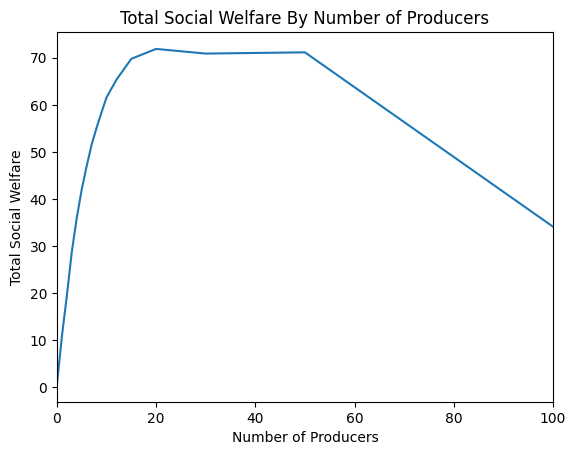

In [9]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", stats['total_social_welfare'], tests[varied_param], varied_param_x_label, 'Total Social Welfare')

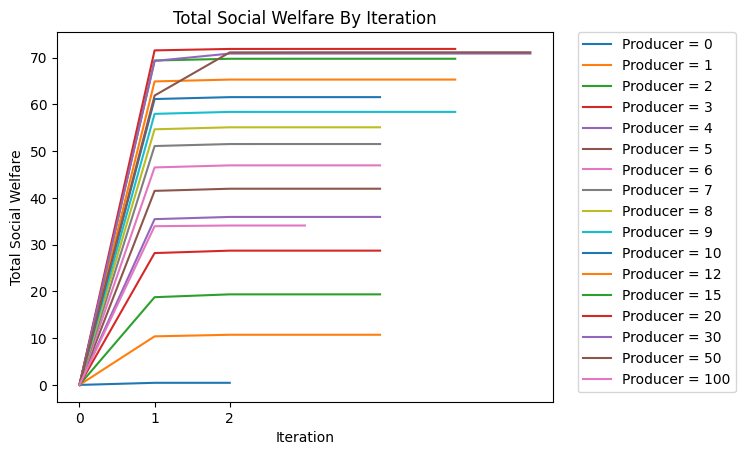

In [10]:
visualize.plot_value_by_iteration_by_test("Total Social Welfare By Iteration", stats['total_social_welfare'], tests[varied_param], varied_param_legend_label, 'Total Social Welfare')

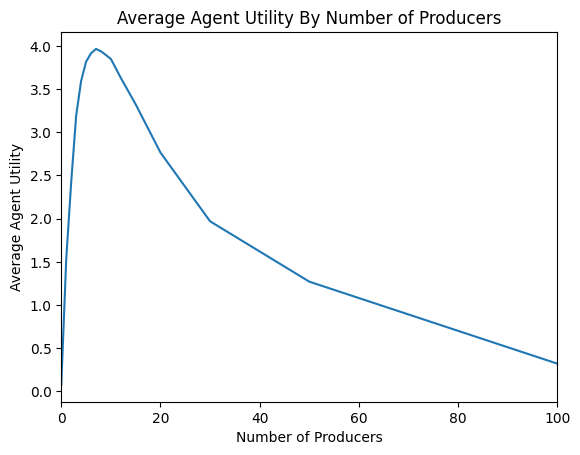

In [11]:
visualize.plot_ending_value_by_test(f"Average Agent Utility By {varied_param_x_label}", stats['average_agent_utilities'], tests[varied_param], varied_param_x_label, 'Average Agent Utility')

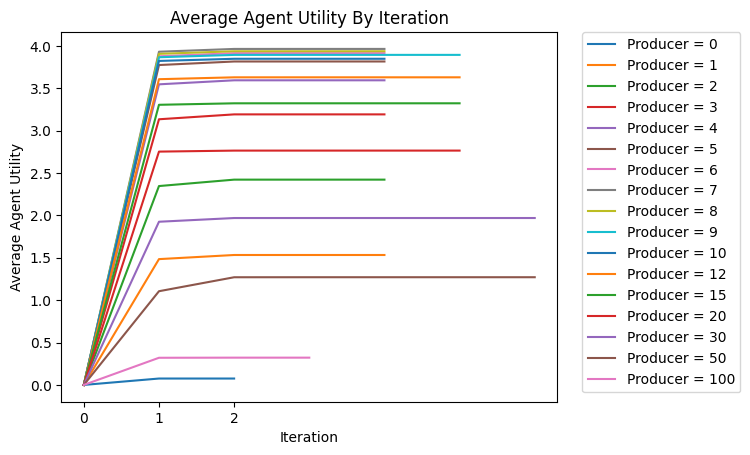

In [12]:
visualize.plot_value_by_iteration_by_test("Average Agent Utility By Iteration", stats['average_agent_utilities'], tests[varied_param], varied_param_legend_label, 'Average Agent Utility')

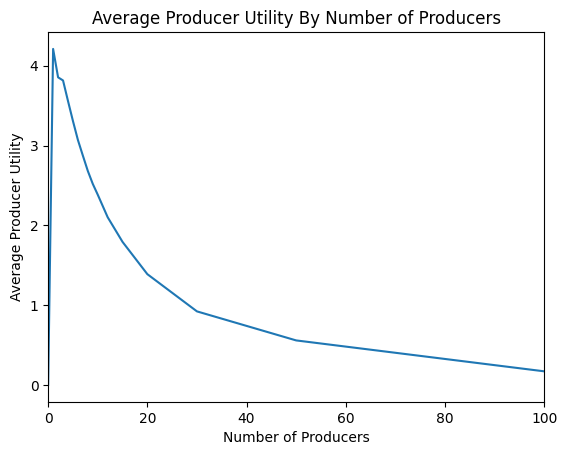

In [13]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", stats['average_producer_utilities'], tests[varied_param], varied_param_x_label, 'Average Producer Utility')

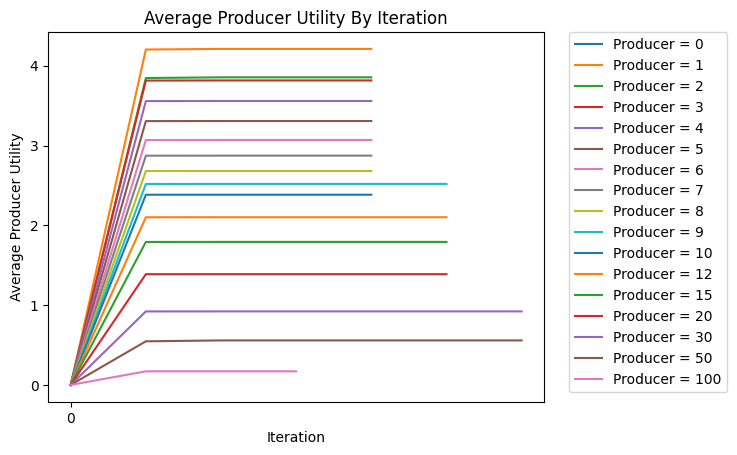

In [14]:
visualize.plot_value_by_iteration_by_test("Average Producer Utility By Iteration", stats['average_producer_utilities'], tests[varied_param], varied_param_legend_label, 'Average Producer Utility')

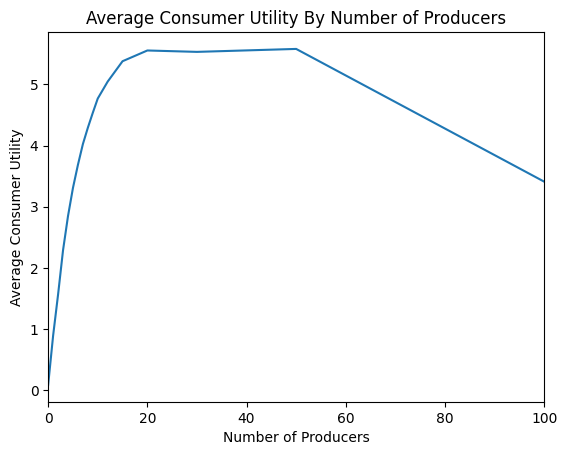

In [15]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", stats['average_consumer_utilities'], tests[varied_param], varied_param_x_label, 'Average Consumer Utility')

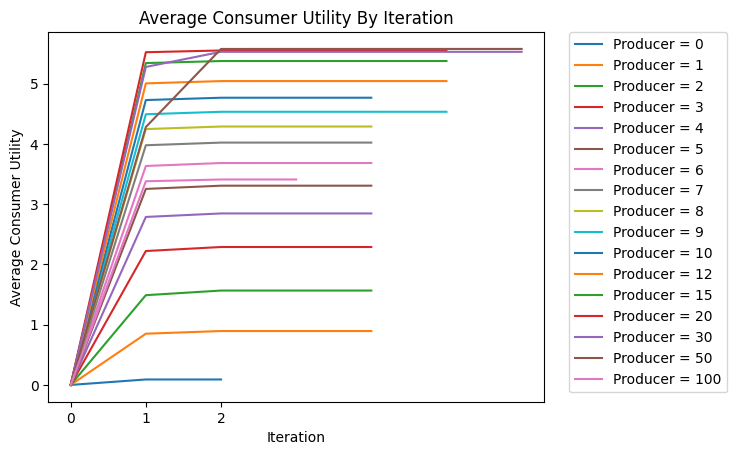

In [16]:
visualize.plot_value_by_iteration_by_test("Average Consumer Utility By Iteration", stats['average_consumer_utilities'], tests[varied_param], varied_param_legend_label, 'Average Consumer Utility')

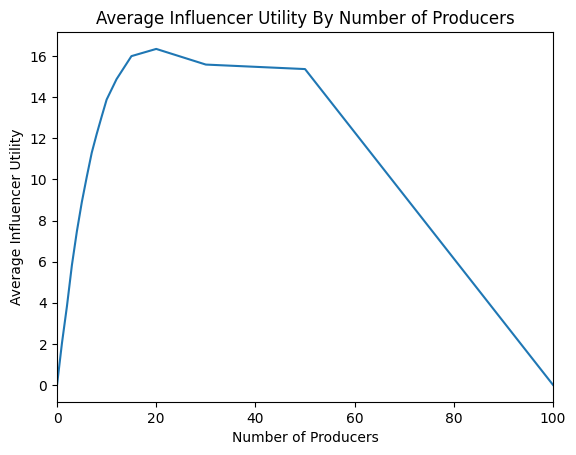

In [17]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", stats['average_influencer_utilities'], tests[varied_param], varied_param_x_label, 'Average Influencer Utility')

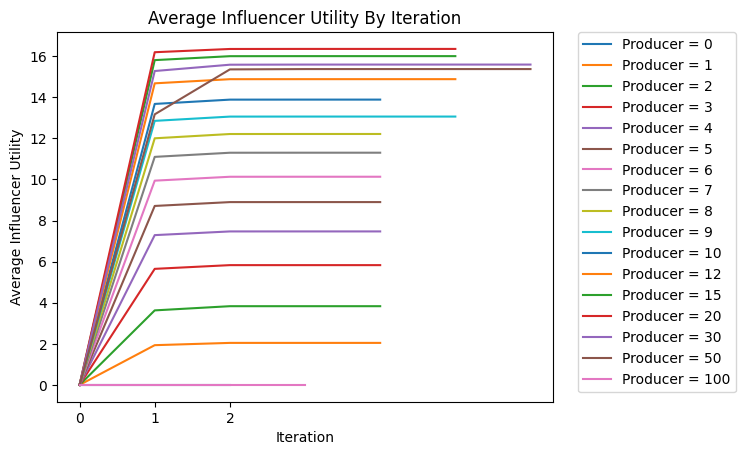

In [18]:
visualize.plot_value_by_iteration_by_test("Average Influencer Utility By Iteration", stats['average_influencer_utilities'], tests[varied_param], varied_param_legend_label, 'Average Influencer Utility')

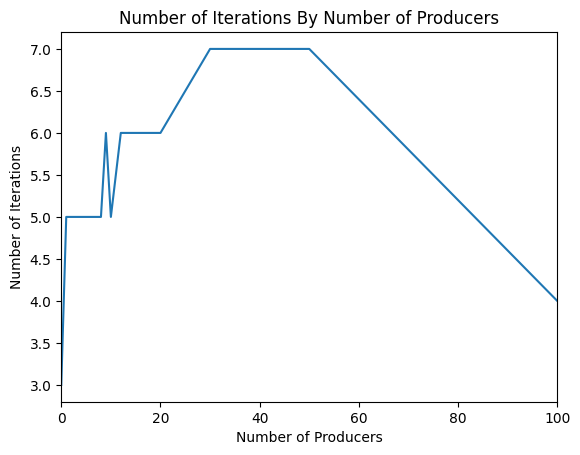

In [19]:
visualize.plot_ending_value_by_test(f"Number of Iterations By {varied_param_x_label}", stats['num_iterations'], tests[varied_param], varied_param_x_label, 'Number of Iterations')